# **Exploratory Data Analysis**

## Objectives
* Have a look at the data

## Inputs

* outputs/datasets/collection/card_transactions.csv

## Outputs

* We shall see, we shall see.

---

# Set up the Working Directory

In [1]:
import os
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/Users/edsmacbook/Library/CloudStorage/OneDrive-Personal/code_institute/predictive_analytics/frauditor'

# Load Collected Data

In [2]:
import pandas as pd
df_raw_path = "outputs/datasets/collection/card_transactions.csv"
df = pd.read_csv(df_raw_path)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Data Explorations

Number of rows and columns

In [ ]:
df.shape

List of column titles

In [ ]:
df.columns

Profile Report

In [ ]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, title='Initial Explore', minimal=True)
pandas_report.to_notebook_iframe()

## View Variables
from: https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e 

In [ ]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

Check for missing data

In [ ]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

Beginning of Correlation stuff

In [3]:
%matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [9]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%  75%    max
ppscore   55.0  0.001  0.009  0.0  0.0  0.0  0.0  0.064




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



/var/folders/hs/621kvkf964qcltzl432lc5t00000gn/T/ipykernel_63503/4283799620.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


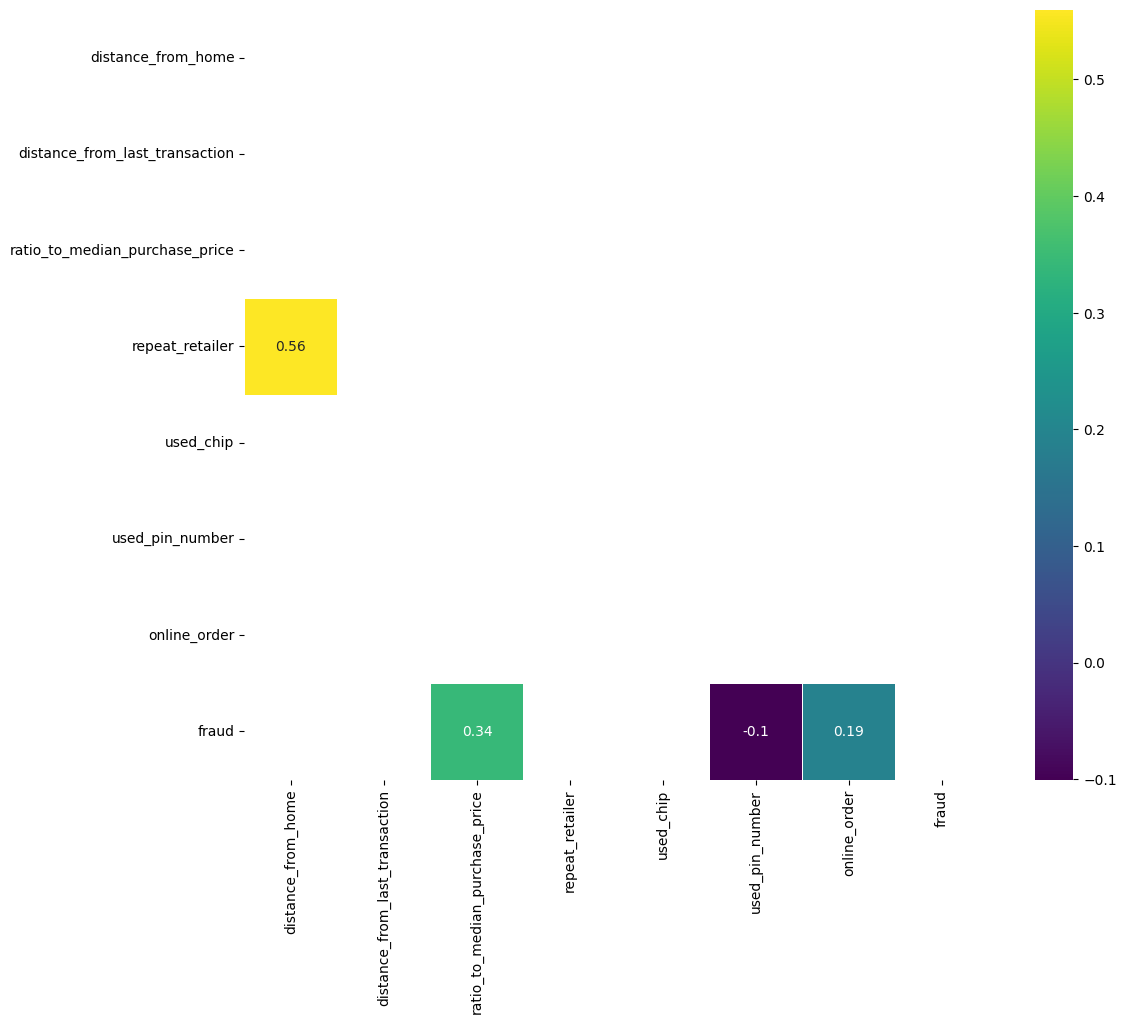



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



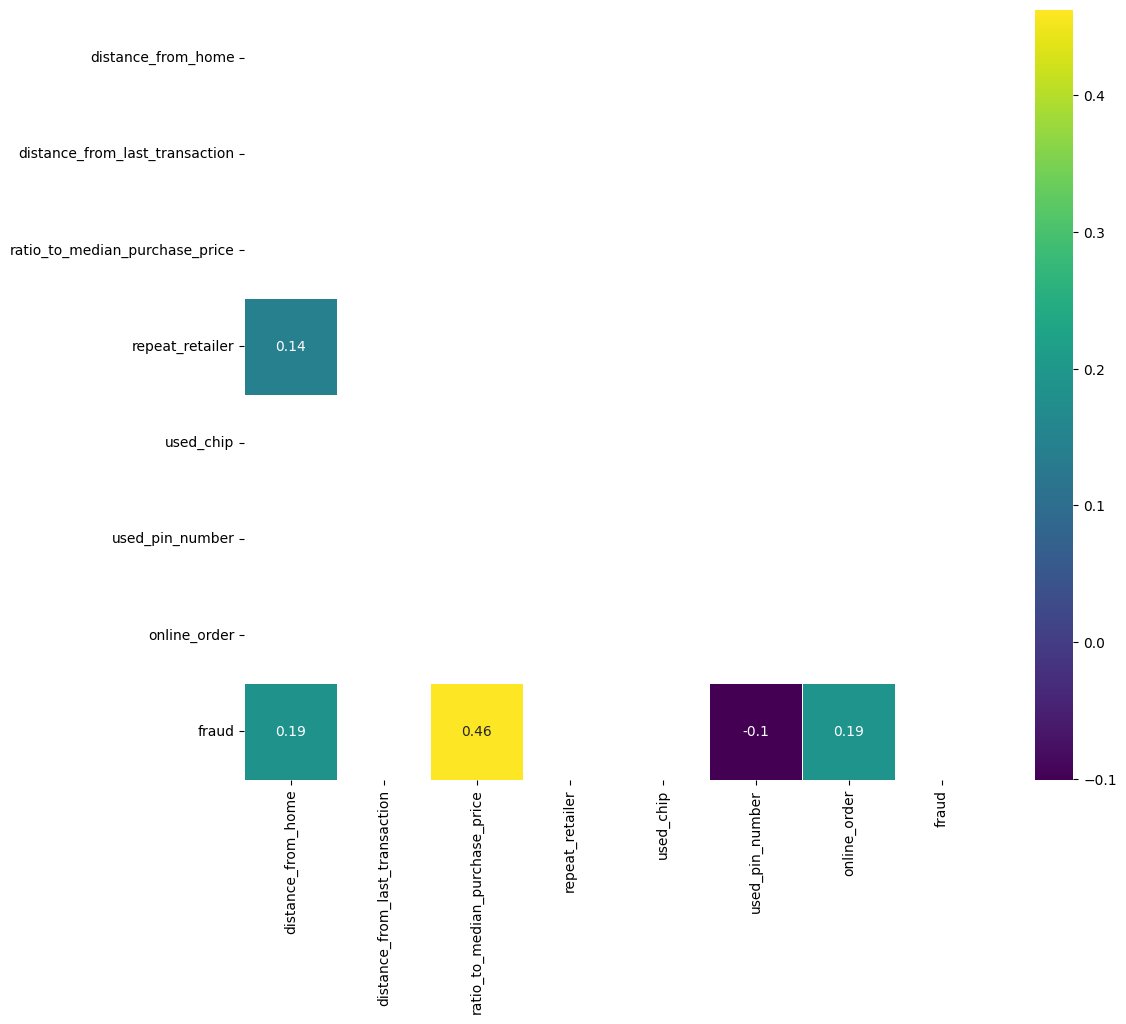



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



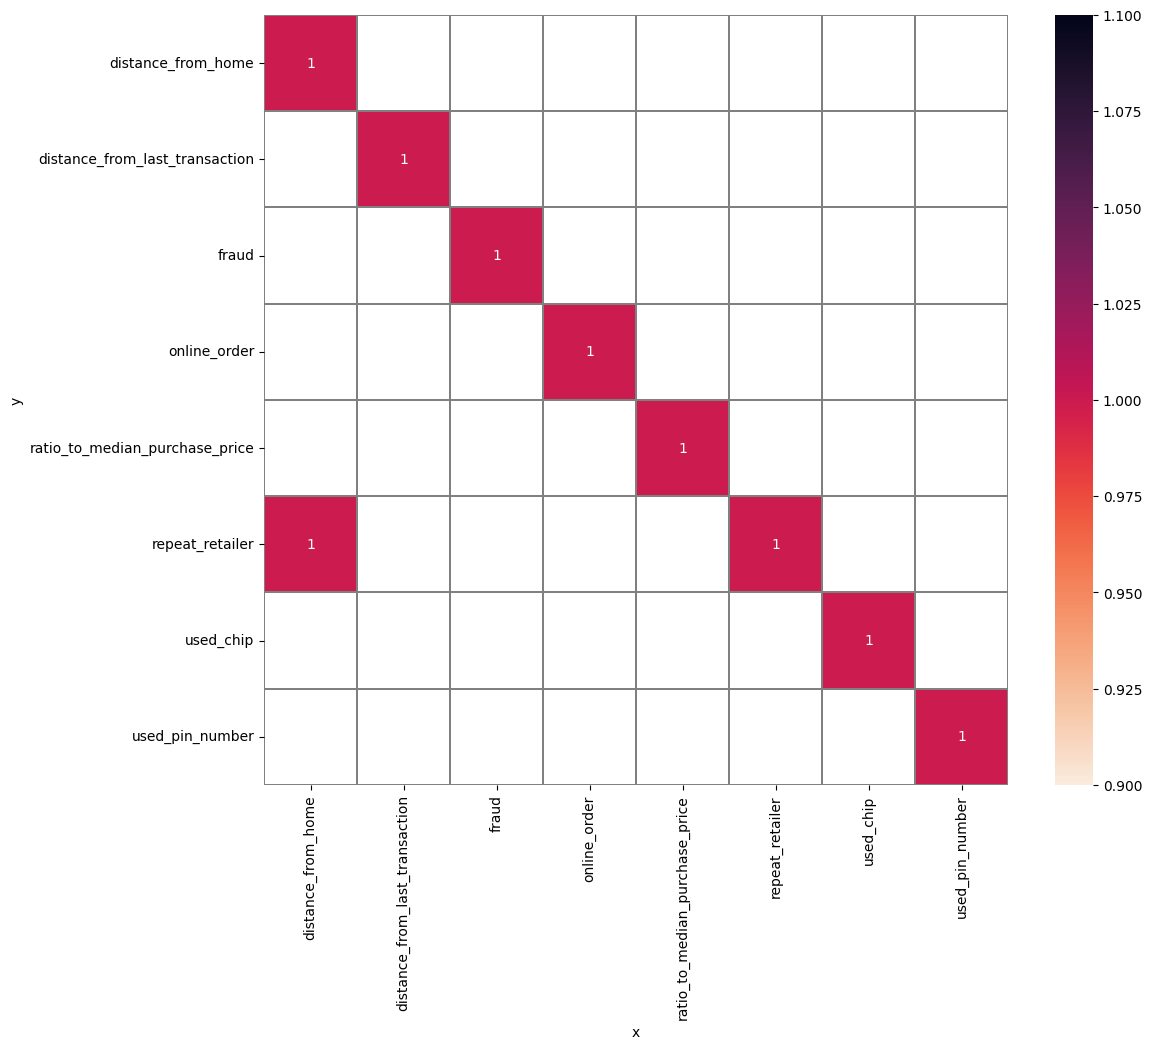

In [12]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.1, PPS_Threshold =0.1,
                  figsize=(12,10), font_annot=10)

---

## Scatter Plot

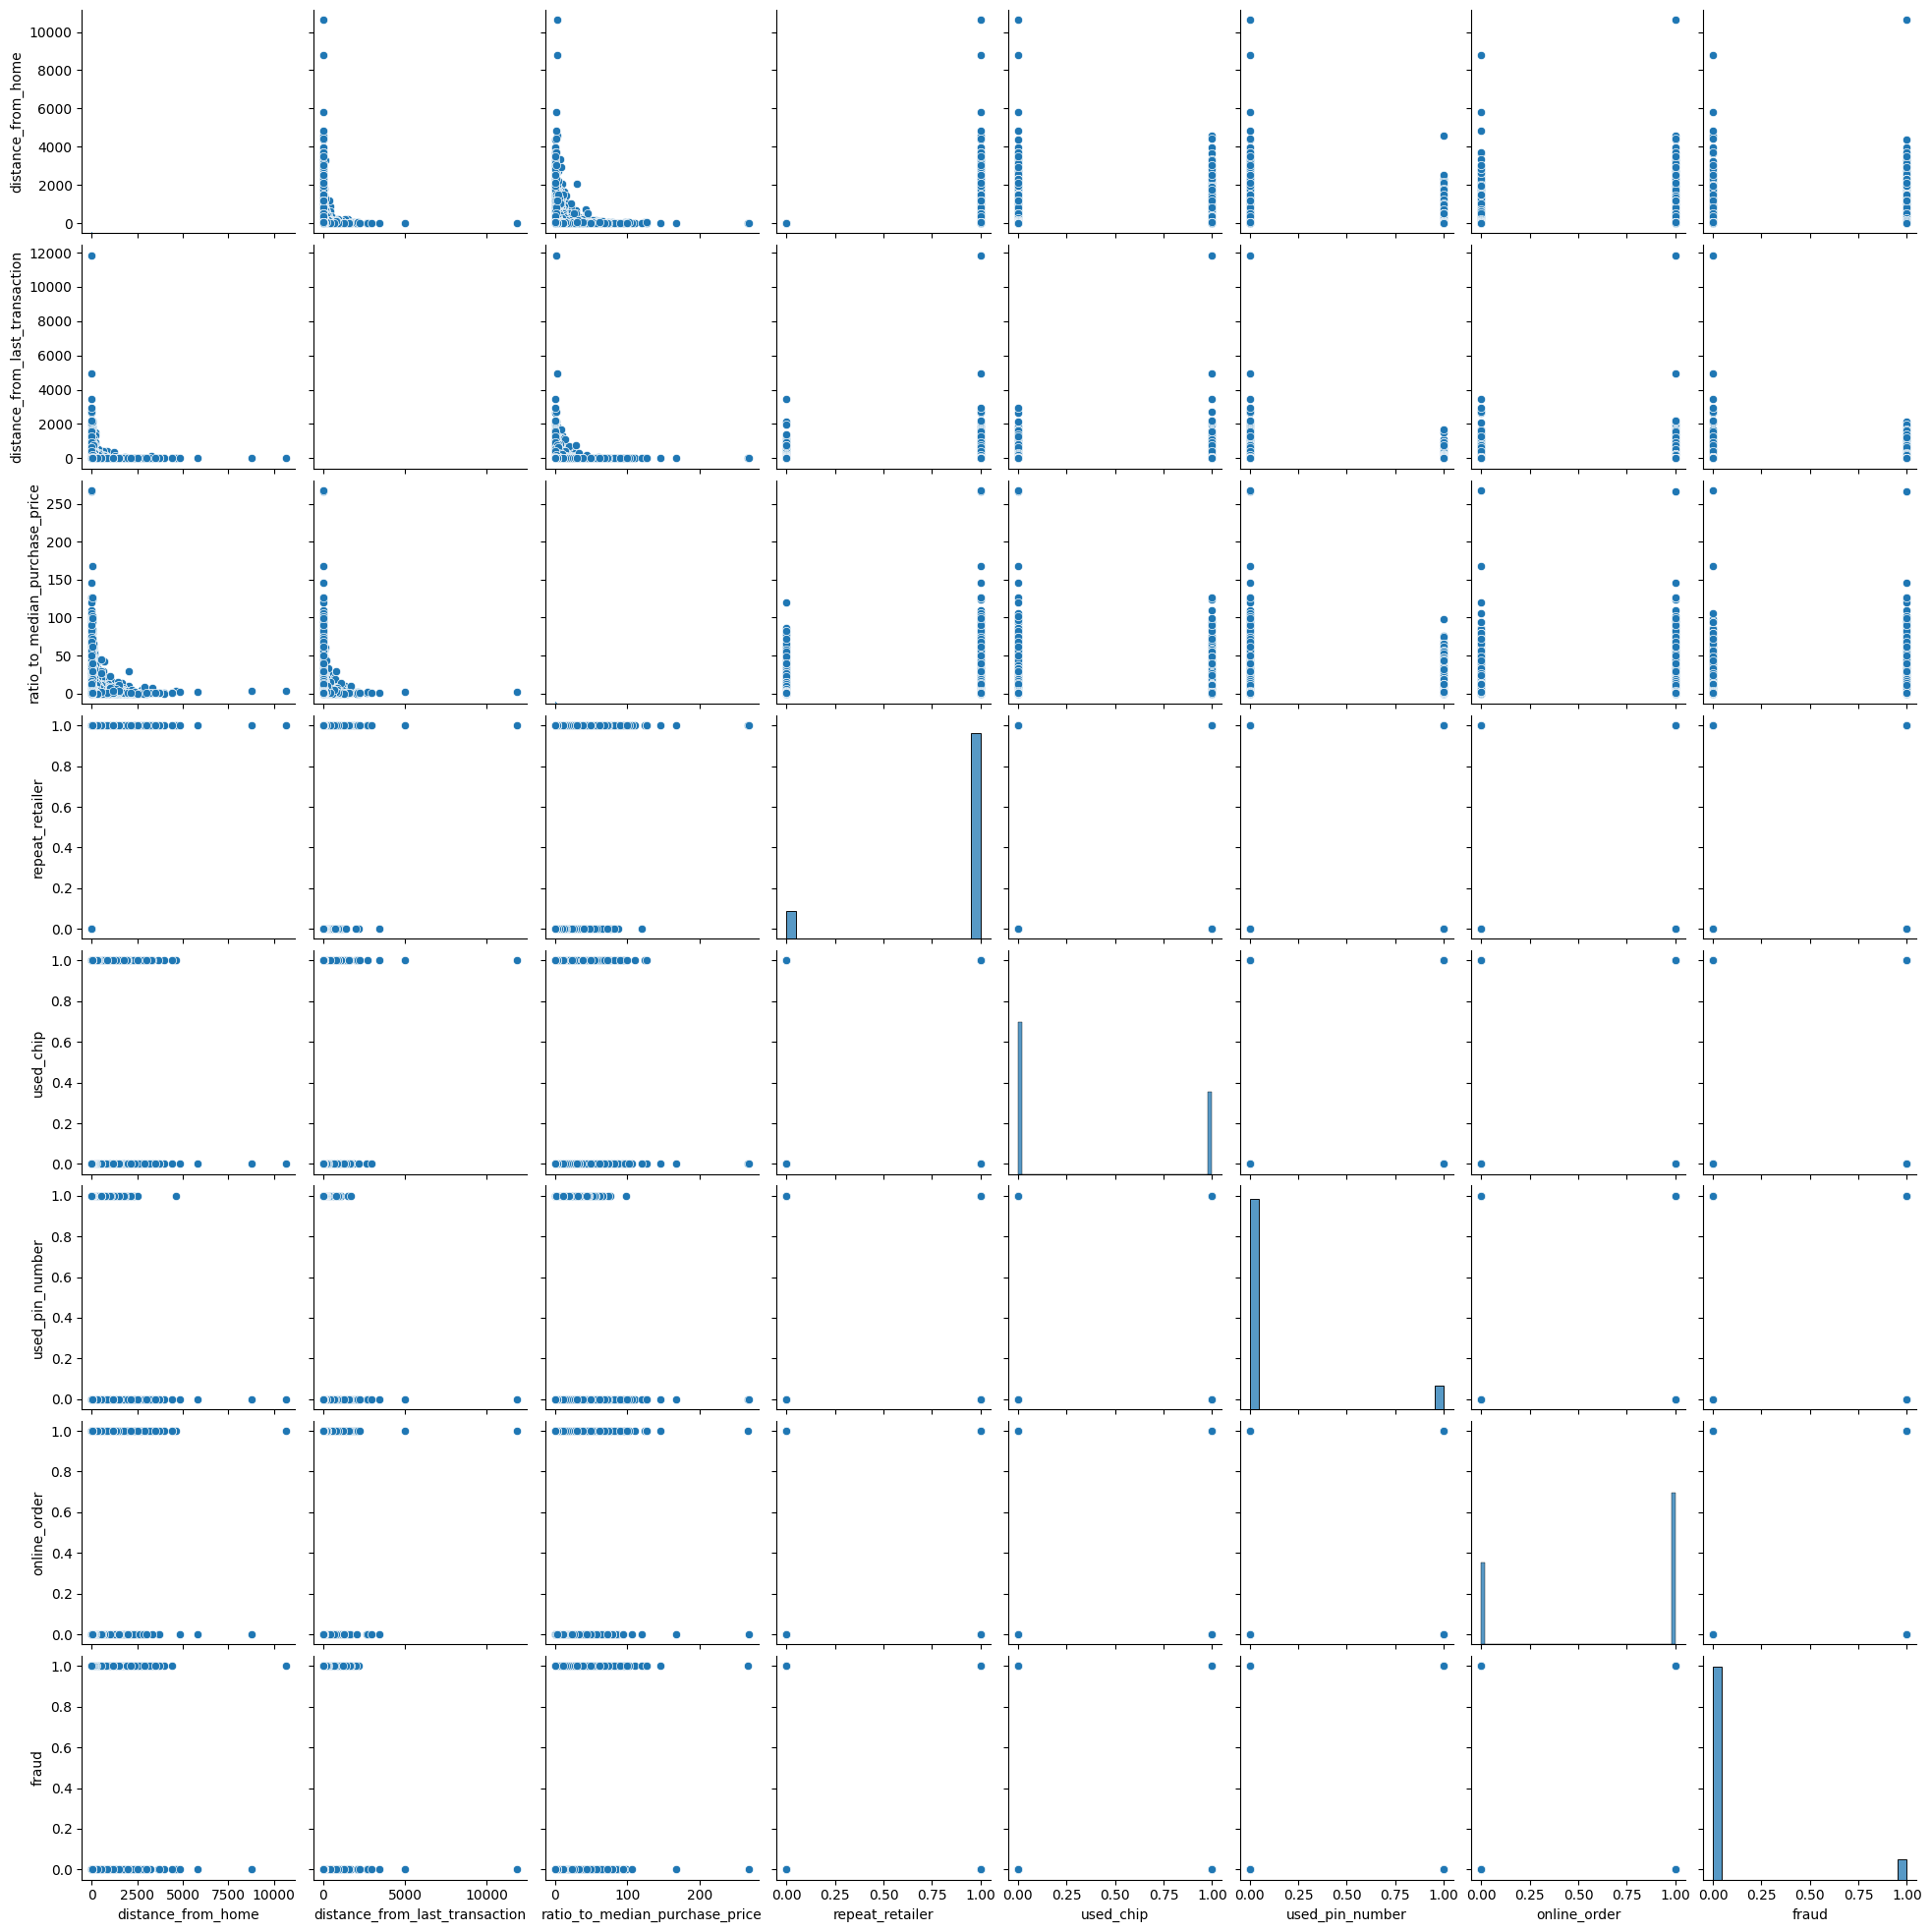

In [13]:
sns.pairplot(df)


Check outliers

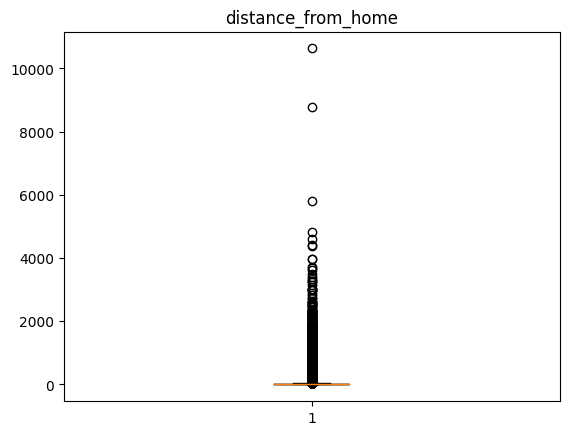

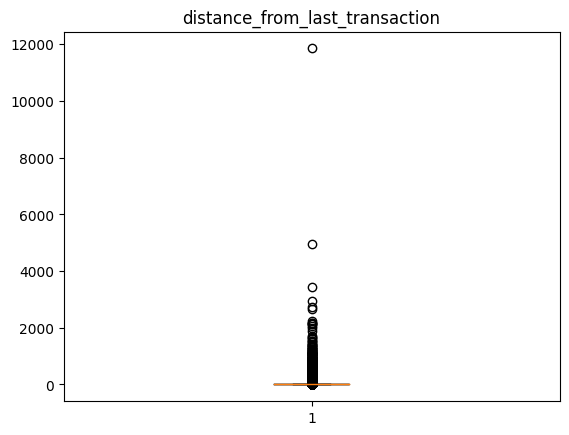

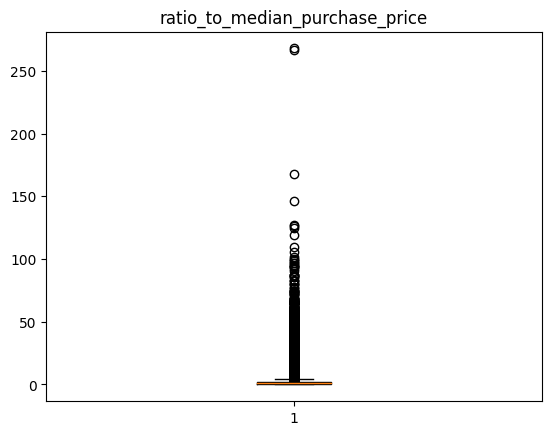

In [16]:
boxplots = []
columns_to_plot = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']


# Loop through each column of the dataframe
for column in columns_to_plot:
    # Create a boxplot for the current column
    fig, ax = plt.subplots()
    ax.boxplot(df[column])
    ax.set_title(column)
    
    # Append the boxplot figure to the list
    boxplots.append(fig)

# Display the boxplot figures
for fig in boxplots:
    plt.show(fig)

How wonky is the data?

In [19]:
fraud_counts = df['fraud'].value_counts()
fraud_percentages = (fraud_counts / len(df)) * 100

for value, count, percentage in zip(fraud_counts.index, fraud_counts, fraud_percentages):
    print(f"Fraudulent Transaction: {value}, Count: {count}, Percentage: {percentage:.2f}%")


Fraudulent Transaction: 0.0, Count: 912597, Percentage: 91.26%
Fraudulent Transaction: 1.0, Count: 87403, Percentage: 8.74%


## Conclusions

* There is no blank data to inpute - that's cracking.
* There are some very extreme outliers but, intuitively, these may be important factors in detecting fraud.
* The data is target ('fraud') is very imbalanced.
* There are no obviously strong candidates for strong correlation.


## Next Steps  

### Data Cleaning
* Turn floats into integers where they represent binary stuff
* Handle target imbalance

### Feature Engineering
* Try some PCA stuff to combine features